# Standing Wave Animation
Created by: Wesley Terrill (04/02/2019)

Revision date: 04/02/2019


We'll plot at various times a wave $u(x,t)$ that starts as a standing wave shape, and then animate it.  We can imagine this as simulating a wave on a taut string.  Here $u$ is the transverse displacement (i.e., $y$ in our two-dimensional plots).  

$\begin{align}
  u(x,t) = 2A\sin{k x} \cos{\omega t}
  \;,
\end{align}$

with 
$\begin{align}
    2A = 1
    \;,
    k = \omega = 2 \pi
\end{align}$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
def u_wave(x_pts, t, A = 1/2., omega=2*np.pi, k=2*np.pi):
    """Returns the wave at time t.
    """
    y_pts = 2 * A * np.sin(k*x_pts) * np.cos(omega * t)
    return y_pts

In [4]:
# Set up the array of x points (whatever looks good)
x_min = 0.
x_max = +5.
delta_x = 0.01
x_pts = np.arange(x_min, x_max, delta_x)

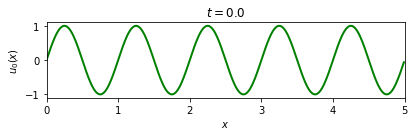

In [21]:
# Define the initial (t=0) wave form and the wave speed.
A = 1/2.
omega = 2 * np.pi
k = 2 * np.pi
gap = 1
# Make a figure showing the initial wave.
t_now = 0.

fig = plt.figure(figsize=(6,2), num='Standing Wave')
ax = fig.add_subplot(1,1,1)
ax.set_xlim(x_min, x_max)
gap = 0.1
ax.set_ylim(-2*A-gap, 2*A + gap)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u_0(x)$')
ax.set_title(rf'$t = {t_now:.1f}$')

line, = ax.plot(x_pts, 
                u_wave(x_pts, t_now, A=A, omega=omega, k=k), 
                color='green', lw=2)

fig.tight_layout()

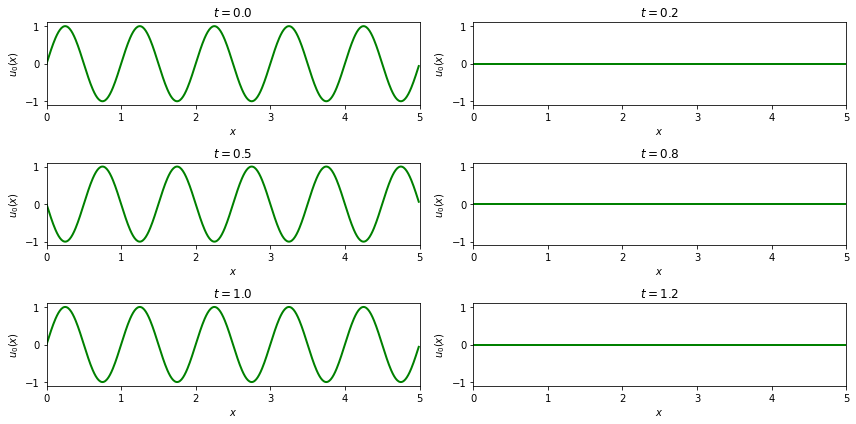

In [28]:
t_array = np.array([0., 2*np.pi/(4*omega),  2*np.pi/(2*omega),\
                    3*2*np.pi/(4*omega),  2*np.pi/omega,  5*2*np.pi/(4*omega)])

fig_array = plt.figure(figsize=(12,6), num='Standing wave')

for i, t_now in enumerate(t_array): 
    ax_array = fig_array.add_subplot(3, 2, i+1)
    ax_array.set_xlim(x_min, x_max)
    gap = 0.1
    ax_array.set_ylim(-2*A-gap, 2*A + gap)
    ax_array.set_xlabel(r'$x$')
    ax_array.set_ylabel(r'$u_0(x)$')
    ax_array.set_title(rf'$t = {t_now:.1f}$')

    ax_array.plot(x_pts, 
                  u_wave(x_pts, t_now, A=A, omega=omega, k=k), 
                  color='green', lw=2)

fig_array.tight_layout()
fig_array.savefig('Taylor_16_8_standing_waves.png', 
                   bbox_inches='tight')  

In [52]:
# Set up the t mesh for the animation.  The maximum value of t shown in
#  the movie will be t_min + delta_t * frame_number
t_min = 0.   # You can make this negative to see what happens before t=0!
t_max = 2.4
delta_t = 0.01
t_pts = np.arange(t_min, t_max+delta_t, delta_t)


In [53]:
%%capture

fig_anim = plt.figure(figsize=(6,2), num='Standing wave')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
gap = 0.1
ax_anim.set_ylim(-2*A-gap, 2*A + gap)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
line_anim, = ax_anim.plot(x_pts, 
                          u_wave(x_pts, t=t_min, A=A, omega=omega, k=k), 
                          color='green', lw=2)

fig_anim.tight_layout()

In [54]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    t = t_pts[i]
    y_pts = u_wave(x_pts, t, A=A, omega=omega, k=k) 

    line_anim.set_data(x_pts, y_pts)  # overwrite line_anim with new points
    return (line_anim,)   # this is needed for blit=True to work

In [55]:
frame_interval = 40.  # time between frames
frame_number = int(np.abs(t_max-t_min)/delta_t)    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=False,
                               repeat=False)

In [56]:
HTML(anim.to_jshtml())